<a href="https://colab.research.google.com/github/CorentinMAG/AI/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

L'objectif est de répondre à la question: Étant donné les caractéristiques de mon appartement, combien devrais-je normalement payer mon loyer ?

Pour l'instant, la seule caractéristique dont on dispose est la surface de l'appartement

A partir d'un jeu de données, on va essayer de dégager un modèle adapté, l'implémenter en python puis essayer de prédire le loyer d'appartements.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load data
house_data = pd.read_csv('house.csv')
print(house_data)

     loyer  surface
0     1330       37
1     1400       32
2      904       26
3      955       30
4     2545       70
..     ...      ...
540   1490       48
541   2020       58
542   2050       70
543   1220       42
544   1610       44

[545 rows x 2 columns]


Text(0, 0.5, 'Loyer')

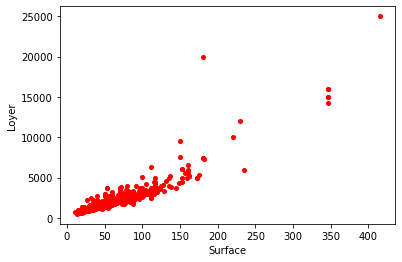

In [3]:
plt.plot(house_data['surface'],house_data['loyer'],'ro',markersize=4)
plt.xlabel('Surface')
plt.ylabel('Loyer')

on voit clairement se dessiner un profil linéaire. On peut émettre l'hypothèse que le phénomène est une droite.
Cependant, quand la surface devient trop grande, les données semblent devenir moins modélisables.
On va donc exclure pour l'instant ces valeurs aberrantes en ne gardant que les loyers inférieurs à 10 000 €

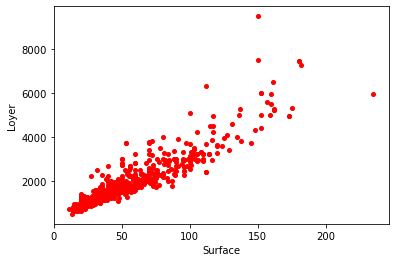

In [4]:
#on exclut les loyer > 10 000€
house_data = house_data[house_data['loyer'] < 10000]
plt.plot(house_data['surface'],house_data['loyer'],'ro',markersize=4)
plt.xlabel('Surface')
plt.ylabel('Loyer')
plt.show()

Notre objectif est donc de trouver l'équation de la droite qui se rapproche le plus des données. Il faut donc minimer les erreurs quadratiques.

Dans notre cas, il s'agit d'une simple regression linéaire car notre problème est unidimensionnel (ne comporte qu'une variable, la surface).
Notre droite sera donc de la forme y = ax + b avec y le loyer et x la surface
La méthode des moindres carrées nous donne les coefficient a et b.  
Il faut résoudre le système (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>Y

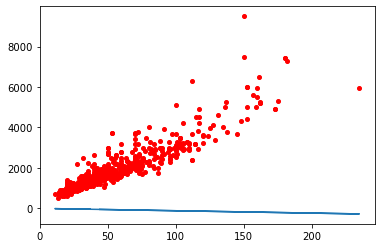

In [5]:
#notre feature
x=house_data['surface']
x=np.array(x).reshape(x.shape[0],1)

y=house_data['loyer']
y=np.array(y).reshape(y.shape[0],1)

#on construit X on a Y=X*theta
X=np.hstack((x,np.ones(x.shape)))

#notre theta est aléatoire, l'algorithme devra trouve le theta optimale
theta = np.random.randn(2,1)

def model(X,theta):
    return X.dot(theta)

plt.plot(x,model(X,theta))
plt.plot(x,y,'ro',markersize=4)
    

On voit clairement que pour l'instant notre modèle ne correspond pas du tout à nos données.
Calculons la fonction de coût 

In [6]:
def cost_function(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)
cost_function(X,y,theta)

3088092.747469703

Notre erreur est donc très élevé. Il faut la minimiser.
Pour cela on peut utiliser la méthode des moindres carrés dont le système a été donnée ci-dessus

In [7]:
def moindres_carrés(X,y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_final = moindres_carrés(X,y)
print(theta_final)


[[ 30.66119596]
 [266.45460292]]


ainsi dans l'équation de notre droite, b = 266.5 et a = 30.7
notre régression linéaire donne donc la droite y = 30.7x + 266.5 comme étant le modèle de répartition de nos données (pour un loyer inférieur à 10 000 €)
Affichons la droite pour voir si elle est bien représentative

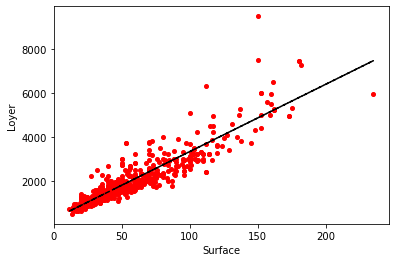

In [8]:
plt.plot(x,y,'ro',markersize=4)
plt.plot(x,model(X,theta_final),linestyle='--',c='#000000')
plt.xlabel('Surface')
plt.ylabel('Loyer')
plt.show()

La droite semble bien modéliser la répartition de nos données
On peut maintenant utiliser notre modèle pour faire des prédictions.
pour un appartement de 37 m<sup>2</sup>, on trouve une estimation du loyer

In [9]:
print(theta_final.item(1) + theta_final.item(0) * 37,'€')

1400.9188534828068 €


on trouve un loyer de 1401 €. En réalité, dans nos données on trouve qu'un appartement de 37m<sup>2</sup> vaut 1330 €.
Notre modèle n'est pas super précis.
ici on a décomposé l'entrainement de la regression linéaire. Dans scikit-learn la régression est déjà implémentée

In [10]:
#la même chose mais avec scikit-learn
from sklearn import linear_model
regression = linear_model.LinearRegression()

#on entraine l'algorithme avec nos données
regression.fit(x,y)

#on fait une prédiction, pour le premier jeu de données qu'on a loyer = 1330 surface = 37
result = regression.predict(x)
print(result[0])

[1400.91885348]


notre modèle trouve un loyer de 1401€ alors qu'en réalité le loyer est de 1330 €.
Notre algorithme n'a peut être pas assez de donnée du coup il n'est pas très précis. Il faut augmenter le nombre de donnée à tester.
Ici, on a fait de l'entrainement avec toutes nos données puis on a fait des prédictions sur ces mêmes données.
En réalité, on va séparer  notre jeu de donnée en plusieurs dataset.
1. un dataset pour entrainer le modèle
2. un dataset pour tester le modèle
3. un dataset pour valider le modèle

Le dataset de test va nous servir à quantifier la qualité du modèle

0.0037313432835820895


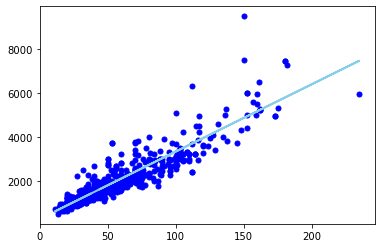

In [11]:
from sklearn.metrics import accuracy_score
plt.plot(x, y, 'bo', markersize = 5)
plt.plot(x, result, color="skyblue", linewidth = 2)
print(accuracy_score(np.round(result),np.round(y)))

ici on voit que nos prédictions ne sont pas du tout en adéquation avec nos données. La méthode de régression linéaire n'est pas suffisament précise. Il est vrai que le loyer ne dépend pas uniquement de la surface, mais aussi de la localisation, du nombre de pièce...
On pourrait améliorer notre algorithme en:
1. augmentant le nombre de paramètres
2. augmentant le nombre de données
3. tester d'autres algorithmes

On a recréé la droite régression sur les données brutes